In [1]:
%matplotlib notebook

In [2]:
# Purpose of this notebook: test LSTM model on SPY data 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


Using TensorFlow backend.


In [3]:
# convert p_t into a X,Y matrices for classification task
def create_dataset(p_t, dt_back=1):
    dataX, dataY = [], []
    
    for i in range(len(p_t)-dt_back-1):
        a = p_t[i:(i+dt_back), 0]
        dataX.append(a)
        dataY.append(p_t[i + dt_back, 0])
    return np.array(dataX), np.array(dataY)
#end def create_dataset

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

# load the p_t
df = read_csv('sp500.csv', usecols=[0], engine='python', skipfooter=3)
p_t = df.values       
p_t = p_t.astype('float32')

In [5]:
#p_t.shape   #df.values

In [6]:
# normalize the p_t
scaler = MinMaxScaler(feature_range=(0, 1))
p_t = scaler.fit_transform(p_t)

# split into train and test sets
N_train = int(len(p_t) * 0.67)
N_test = len(p_t) - N_train
train, test = p_t[0:N_train,:], p_t[N_train:len(p_t),:]

In [7]:
# reshape into X=t and Y=t+1
dt_back = 30     # look back time period
trainX, trainY = create_dataset(train, dt_back)
testX, testY = create_dataset(test, dt_back)

In [8]:
print(trainX.shape,trainY.shape)

(2746, 30) (2746,)


In [9]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))   # (trainX.shape[0], 1, trainX.shape[1])
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))   # (testX.shape[0], 1, testX.shape[1])

In [10]:
trainX.shape

(2746, 30, 1)

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(dt_back,1)))   # input_shape=(1, dt_back)
model.add(Dense(1))

# compile and fit the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [12]:

for Nb in range(7,64):
    print('------ batch_size=',Nb)
    model = Sequential()
    model.add(LSTM(100, input_shape=(dt_back,1)))   # input_shape=(1, dt_back)
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=5, batch_size=Nb, verbose=2)

    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # invert predictions
    p_train_pred_t = scaler.inverse_transform(trainPredict)
    trainY1 = scaler.inverse_transform([trainY])
    p_test_pred_t = scaler.inverse_transform(testPredict)
    testY1 = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY1[0], p_train_pred_t[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY1[0], p_test_pred_t[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    print('***')
    
# end for Nb in range(7,64):


------ batch_size= 7
Epoch 1/5
5s - loss: 0.0017
Epoch 2/5
4s - loss: 3.1305e-04
Epoch 3/5
4s - loss: 2.7686e-04
Epoch 4/5
4s - loss: 2.5823e-04
Epoch 5/5
4s - loss: 2.2274e-04
Train Score: 21.79 RMSE
Test Score: 23.87 RMSE
***
------ batch_size= 8
Epoch 1/5
4s - loss: 0.0024
Epoch 2/5
4s - loss: 3.3272e-04
Epoch 3/5
4s - loss: 2.8020e-04
Epoch 4/5
4s - loss: 2.5833e-04
Epoch 5/5
4s - loss: 2.5090e-04
Train Score: 21.99 RMSE
Test Score: 24.19 RMSE
***
------ batch_size= 9
Epoch 1/5
4s - loss: 0.0035
Epoch 2/5
3s - loss: 3.3005e-04
Epoch 3/5
3s - loss: 2.8751e-04
Epoch 4/5
4s - loss: 2.7547e-04
Epoch 5/5
3s - loss: 2.7471e-04
Train Score: 21.48 RMSE
Test Score: 26.94 RMSE
***
------ batch_size= 10
Epoch 1/5
4s - loss: 0.0035
Epoch 2/5
3s - loss: 3.6689e-04
Epoch 3/5
3s - loss: 3.1051e-04
Epoch 4/5
3s - loss: 2.8643e-04
Epoch 5/5
3s - loss: 2.5619e-04
Train Score: 24.29 RMSE
Test Score: 26.94 RMSE
***
------ batch_size= 11
Epoch 1/5
4s - loss: 0.0023
Epoch 2/5
3s - loss: 3.0348e-04
Epoch

Epoch 1/5
3s - loss: 0.0114
Epoch 2/5
1s - loss: 4.4257e-04
Epoch 3/5
1s - loss: 3.2485e-04
Epoch 4/5
1s - loss: 3.1433e-04
Epoch 5/5
1s - loss: 3.0555e-04
Train Score: 25.25 RMSE
Test Score: 38.96 RMSE
***
------ batch_size= 44
Epoch 1/5
3s - loss: 0.0159
Epoch 2/5
1s - loss: 5.4722e-04
Epoch 3/5
1s - loss: 3.4933e-04
Epoch 4/5
1s - loss: 3.4400e-04
Epoch 5/5
1s - loss: 3.3165e-04
Train Score: 26.34 RMSE
Test Score: 48.70 RMSE
***
------ batch_size= 45
Epoch 1/5
3s - loss: 0.0069
Epoch 2/5
1s - loss: 3.7148e-04
Epoch 3/5
1s - loss: 3.0521e-04
Epoch 4/5
1s - loss: 3.0802e-04
Epoch 5/5
1s - loss: 3.0854e-04
Train Score: 24.38 RMSE
Test Score: 28.91 RMSE
***
------ batch_size= 46
Epoch 1/5
3s - loss: 0.0112
Epoch 2/5
1s - loss: 4.4493e-04
Epoch 3/5
1s - loss: 3.2558e-04
Epoch 4/5
1s - loss: 3.2155e-04
Epoch 5/5
1s - loss: 3.0979e-04
Train Score: 25.28 RMSE
Test Score: 36.99 RMSE
***
------ batch_size= 47
Epoch 1/5
3s - loss: 0.0098
Epoch 2/5
1s - loss: 3.8507e-04
Epoch 3/5
1s - loss: 3.0

In [13]:
# create a function to define the LSTM model
def make_model(dt_back=10):
    model = Sequential()
    model.add(LSTM(100, input_shape=(dt_back,1)))   # input_shape=(1, dt_back)  , activation='relu')
    model.add(Dense(1))                             # , activation='sigmoid'
    model.compile(loss='mean_squared_error', optimizer='adam')   # loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']
    
    return model
# end def make_model():

In [14]:
# prepare for hyperparameter search by first wrapping the model in Keras Classifier
model = KerasClassifier(build_fn=make_model,dt_back=dt_back,verbose=0)

# define the grid search parameters
batch_size_n = [2]    # [2,4,8,10,12,14,16,18,20]
epoch_n = [2]   # [2,5,7,10]
param_grid = dict(batch_size=batch_size_n, epochs=epoch_n)

In [15]:
# perform hyperparameter grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

In [17]:
# Cell-with-GridSearch
#grid_result = grid.fit(trainX,trainY)

#print("Best score=%f with %s" % (grid_result.best_score_, grid_result.best_params_))

print('Best model: batch size=11, ','Train Score=21.09 RMSE, ','Test Score=23.97 RMSE ')

Best model: batch size=11,  Train Score=21.09 RMSE,  Test Score=23.97 RMSE 


In [18]:
model = Sequential()
model.add(LSTM(100, input_shape=(dt_back,1)))   # input_shape=(1, dt_back)  , activation='relu')
model.add(Dense(1))                             # , activation='sigmoid'
model.compile(loss='mean_squared_error', optimizer='adam')   # loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']

model.fit(trainX, trainY, epochs=5, batch_size=11, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
p_train_pred_t = scaler.inverse_transform(trainPredict)
trainY1 = scaler.inverse_transform([trainY])
p_test_pred_t = scaler.inverse_transform(testPredict)
testY1 = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY1[0], p_train_pred_t[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY1[0], p_test_pred_t[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/5
6s - loss: 0.0033
Epoch 2/5
3s - loss: 3.3325e-04
Epoch 3/5
3s - loss: 3.1331e-04
Epoch 4/5
3s - loss: 2.8316e-04
Epoch 5/5
3s - loss: 2.8280e-04
Train Score: 22.08 RMSE
Test Score: 25.21 RMSE


In [23]:
# shift train predictions for plotting
p_train_pred_pl_t = np.empty_like(p_t)
p_train_pred_pl_t[:, :] = np.nan
p_train_pred_pl_t[dt_back:len(p_train_pred_t)+dt_back, :] = p_train_pred_t

# shift test predictions for plotting
p_test_pred_pl_t = np.empty_like(p_t)
p_test_pred_pl_t[:, :] = np.nan
p_test_pred_pl_t[len(p_train_pred_t)+(dt_back*2)+1:len(p_t)-1, :] = p_test_pred_t

trainY2 = np.reshape(trainY1,(trainY1.shape[1],trainY1.shape[0]))   #np.array(trainY1)   #.shape

p_pl_t=scaler.inverse_transform(p_t)

<IPython.core.display.Javascript object>


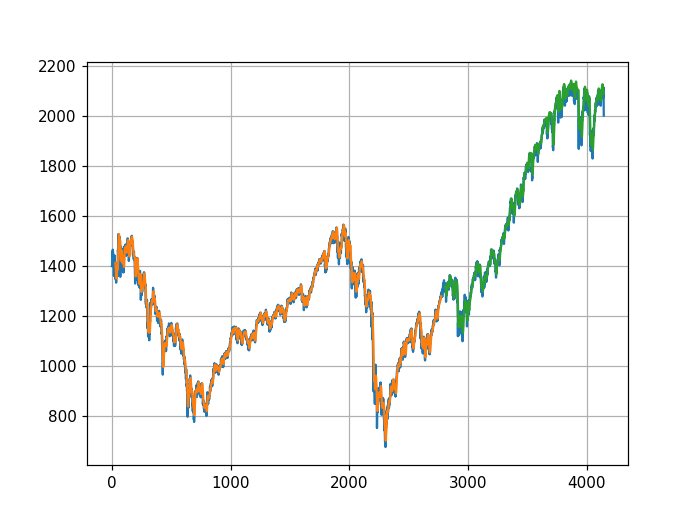

In [24]:
# plot baseline and predictions
fig1 = plt.figure()

plt.plot(p_pl_t)   # (trainY2)   # [2700:2900]
plt.plot(p_train_pred_pl_t)   #(p_train_pred_t)    # [2700:2900]
plt.plot(p_test_pred_pl_t)    # [2700:2900]
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


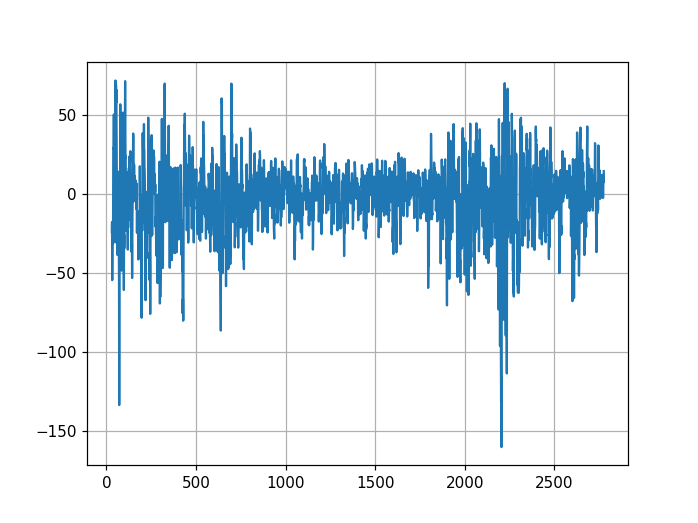

In [21]:
# plot prediction errors
fig2 = plt.figure()

plt.plot(p_pl_t-p_train_pred_pl_t)   # (trainY2)   # [2700:2900]
#plt.plot(p_train_pred_pl_t)   #(p_train_pred_t)    # [2700:2900]
#plt.plot(p_test_pred_pl_t)    # [2700:2900]
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


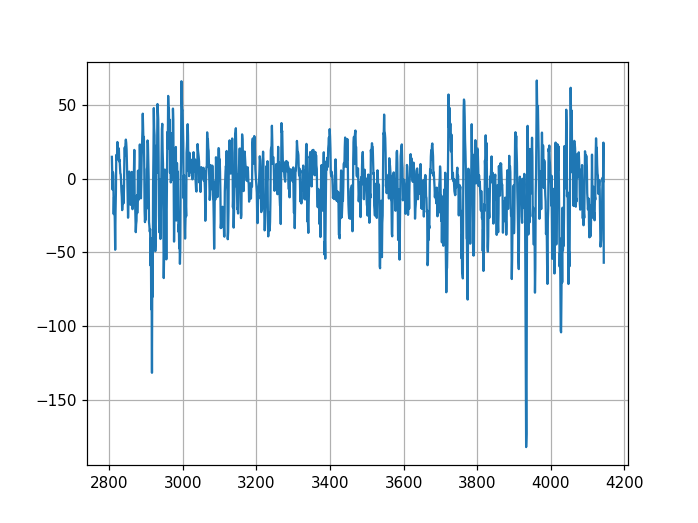

In [25]:
# plot prediction errors
fig2 = plt.figure()

#plt.plot(p_pl_t-p_train_pred_pl_t)   # (trainY2)   # [2700:2900]
plt.plot(p_pl_t-p_test_pred_pl_t)   #(p_train_pred_t)    # [2700:2900]
#plt.plot(p_test_pred_pl_t)    # [2700:2900]
plt.grid()
plt.show()

Prediction errors show that, the LSTM model partially captures volatility clustering effects!